<br>
<font color='darkred', size="6">
    <center>
        <b> Correlation & Convolution
 </b>
    </center>
</font>

# Correlation
<br>
<font size="5">
    $$ \vec{x} \otimes \vec{f} [i] = \sum_{u=-k}^{k} x[i+u] f[v]$$
</font>


<br>
<font size="5">
    $$ L_{o} = L_{i} - L_{f} + 1 $$
</font>

Correlation : 두 개의 유사성 <br/>
Convolution : filter를 통과한 output <br/>

sigmoid : s1 | s2 | s3 | s4 | s5 ... <br/>
filter  : f1 | f2 | f3  (3size)<br/>
 
correlation : 
1. s1Xf1 + s2Xf2 + s3Xf3 <br/>
2. s2Xf1 + s3Xf2 + s4Xf3

## 미리 구현

input data: [0, -1, 0, -1, 1, -1, 0, 1, -1, 0, -1, 0, 0, -1, 1, 1, 1, -1, -1, -1, 0, 1, -1, 1, 1, -1, -1, 1, 0, 0]
input data length : 30 

correlated data: [-1, 0, 0, 1, -2, 2, 0, -2, 0, -1, 1, -1, 0, 3, 1, -1, -3, -1, 0, 2, 0, -1, 3, -1, -3, 1, 2, -1]
input data length : 28 



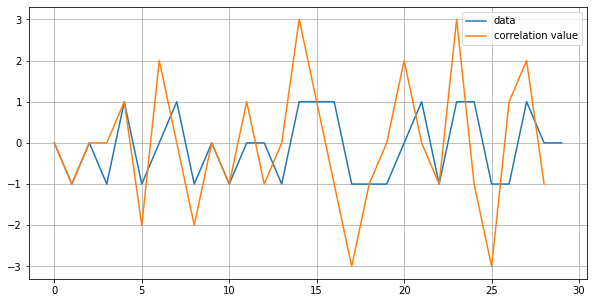

In [30]:
import random
import matplotlib.pyplot as plt

data = [random.randint(-1,1) for _ in range(30)]
corr_filter = [-1, 1, 1]

valid_len = len(data) - len(corr_filter) + 1
print(f"input data: {data}")
print(f"input data length : {len(data)} \n")

correlated = list()
window = list()

for data_idx in range(valid_len):
    window = data[data_idx : data_idx + len(corr_filter)]
    
    win_corr = 0
    for corr_idx in range(len(corr_filter)):
        win_corr += window[corr_idx] * corr_filter[corr_idx]
    correlated.append(win_corr)

print(f"correlated data: {correlated}")
print(f"input data length : {len(correlated)} \n")

# graph
fig, ax = plt.subplots(figsize=(10,5))
correlated = [0] + correlated

ax.plot(data, label='data')
ax.plot(correlated, label="correlation value")
ax.legend(fontsize=10)
ax.grid()

**신호처리에서는 correlation이 자신이 원하는 신호를 뽑을 때 사용**

## 복습 구현

Input data: [1, -1, -1, -1, 0, -1, 0, 1, 1, -1, -1, 0, -1, 1, 1, 1, -1, 0, -1, 1, 1, 1, 0, 0, 0, 1, 1, -1, -1, 0]
Length of Input data: 30 

Correlation : [-3, -1, 0, 0, -1, 2, 2, -1, -3, 0, 0, 0, 3, 1, -1, -2, 0, 0, 3, 1, 0, -1, 0, 1, 2, -1, -3, 0]


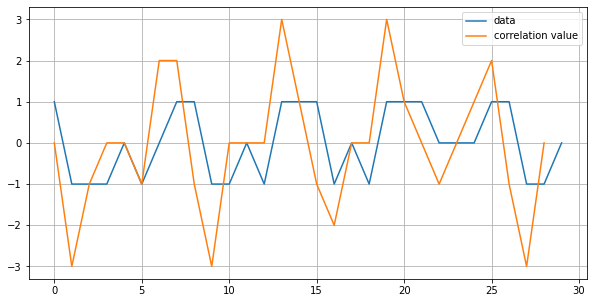

In [43]:
import random
import matplotlib.pyplot as plt

data = [random.randint(-1,1) for _ in range(30)]
corr_filter = [-1, 1, 1]

print(f"Input data: {data}")
print(f"Length of Input data: {len(data)} \n")

data_len = len(data)
filter_size = len(corr_filter)

valid_len = data_len - filter_size + 1

corr_vec = list()
for co_loc in range(valid_len):
    window = data[co_loc : co_loc + filter_size]
    
    corr = 0
    for win , co in zip(window, corr_filter):
        corr += win*co
    corr_vec.append(corr)
print(f"Correlation : {corr_vec}")

# graph
fig, ax = plt.subplots(figsize=(10,5))
corr_vec =  [0] + corr_vec # 시작값을 0으로

ax.plot(data, label="data")
ax.plot(corr_vec, label="correlation value")
ax.legend(fontsize=10)
ax.grid()

# Convolution
<br>
<font size="5">
    $$ \vec{x} * \vec{f} [i] = \sum_{u=-k}^{k} x[i+u] f[-v]$$
</font>


<br>
<font size="5">
    $$ L_{o} = L_{i} - L_{f} + 1 $$
</font>

**신호를 180도 회전시킨다** <br/>
y=f(x) -> y=f(-x)

x[i-1]f(+1) <br/>
x[i+0]f(0)  <br/>
x[i+1]f(-1) <br/>

## 미리 구현

Input data: [-1, 1, 1, 1, 1, -1, 0, 1, 0, -1, 0, 1, 1, 0, 0, -1, 1, -1, 1, -1, -1, 0, -1, 1, -1, -1, 1, 0, 0, 0]
Length of Input data: 30
convolution data: [-1, 1, 1, 3, 0, -2, 1, 2, -1, -2, 0, 2, 1, 1, -2, 1, -1, 1, 1, -2, 0, -2, 1, 1, -3, 0, 1, 0]
Length of convolution data: 28


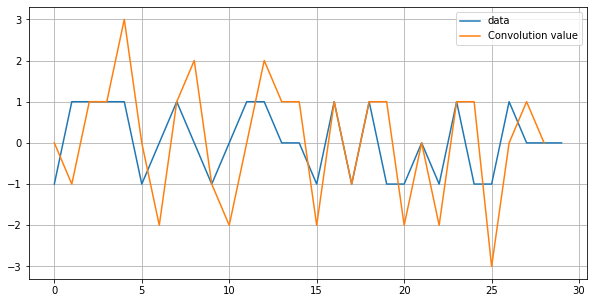

In [53]:
import random
import matplotlib.pyplot as plt

data = [random.randint(-1,1) for _ in range(30)]
conv_filter = [-1, 1, 1]

len_data = len(data)
filter_size = len(conv_filter)

print(f"Input data: {data}")
print(f"Length of Input data: {len_data}")

valid_len = len_data - filter_size + 1
conv_vec = list()

for conv_loc in range(valid_len):
    window = data[conv_loc : conv_loc + filter_size]
    
    conv = 0
    for idx in range(filter_size):
        conv += window[idx]*conv_filter[(filter_size-1) - idx]
    conv_vec.append(conv)
print(f"convolution data: {conv_vec}")
print(f"Length of convolution data: {len(conv_vec)}")

# graph
fig, ax = plt.subplots(figsize=(10,5))
conv_vec = [0] + conv_vec

ax.plot(data, label="data")
ax.plot(conv_vec, label="Convolution value")
ax.legend(fontsize=10)
ax.grid()

## 복습 구현

Input data: [-1, -1, 1, -1, 0, 1, 1, -1, -1, -1, 0, 1, 1, 0, 1, 1, -1, 0, -1, 1, -1, 1, 0, 1, 0, 1, 0, 1, -1, 0]
Length of Input data: 30
convolution data: [-3, 1, 0, -2, 0, 3, 1, -1, -2, -2, 0, 2, 0, 0, 3, 0, 0, -2, 1, -1, 0, 0, 1, 0, 1, 0, 2, 0]
Length of convolution data: 28


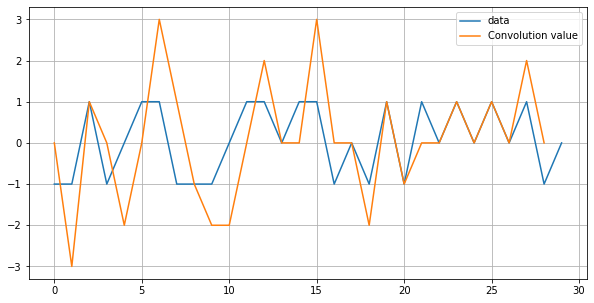

In [54]:
import random
import matplotlib.pyplot as plt

data = [random.randint(-1,1) for _ in range(30)]
conv_filter = [-1, 1, 1]

len_data = len(data)
filter_size = len(conv_filter)

print(f"Input data: {data}")
print(f"Length of Input data: {len_data}")

valid_len = len_data - filter_size + 1
conv_vec = list()

for conv_loc in range(valid_len):
    window = data[conv_loc : conv_loc + filter_size]
    
    conv = 0
    for win, co in zip(window, conv_filter[::-1]):
        conv += win*co
    conv_vec.append(conv)

print(f"convolution data: {conv_vec}")
print(f"Length of convolution data: {len(conv_vec)}")

# graph
fig, ax = plt.subplots(figsize=(10,5))
conv_vec = [0] + conv_vec

ax.plot(data, label="data")
ax.plot(conv_vec, label="Convolution value")
ax.legend(fontsize=10)
ax.grid()